# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\Section8.3Mini-Projects\3ReduceHospitalReadmissions\hospital_readmit

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\Section8.3Mini-Projects\3ReduceHospitalReadmissions\hospital_readmit


In [23]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

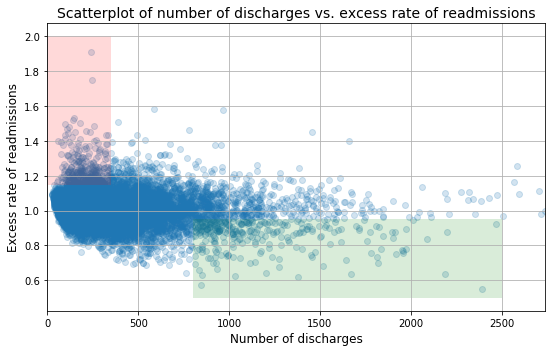

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [7]:
clean_hospital_read_df.tail(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [8]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Start of My Analysis

<div class="span5 alert alert-success">
<p> A: Do you agree with the above analysis and recommendations? Why or why not? </p>
</div>

1. I agree with the findings because based on the scatterplot there does appear to be a downward trend to the readmissions rate as the number of discharges increases. For example in the plot there are at least 20 hospitals with less than 500 discharges and a readmissions ratio > 1.4; while for hospitals with over 1500 discharges there are only 2 that have a readmissions ratio > 1.2.  <br> <br>
  
2. In addition, the preliminary analysis cites a mean of 63% of hospitals with low discharge rates have a readmissions ratio > 1, as opposed to only 44% of hospitals with high discharge rates.  This difference of 19% (63 - 44) seems significant enough to validate the preliminary findings. 

<div class="span5 alert alert-success">
<p> B. Provide support for your arguments and your own recommendations with a statistically sound analysis: </p>
</div>

<div class="span5 alert alert-success">
<p> B1: Setup an appropriate hypothesis test. </p>
</div>

   * Create two dataframes; one for hospitals w/high (>1000) and one for hospitals w/low (< 100) discharges
   
   * Hypothesis: 
     - H0: Readmissions mean of a hospital w/high discharge rates < Readmissions mean of a hospital w/low discharge rates   
     - H1: Readmissions mean of hospital w/high discharge rates >= Readmissions mean of a hospital w/low discharge rate    
     <br>
     - H0: rmhd hospital < rmld hospital
     - H1: rmhd hospital >= rmld hospital     
     
     readmissions mean of hospitals with a low discharge rate: 1.0226183501683506  (calculated below)
     - H0: rmhd < 1.02
     - H1: rmhd >= 1.02

<div class="span5 alert alert-success">
<p> B2: Compute and report the observed significance value (or p-value).    
The p-value computes to 1.00 (see calculations below), which is a high p-value, so based on the permutations samples we reject the null hypothesis and accept the alternate hypothesis that readmissions for hospitals with high discharge rates >= hospitals with low discharge rates. 
</p>
</div>

In [52]:
#1 of 2 to create a permutation sample of the hospitals with high and low discharge rates
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


In [58]:
#2 of 2 in which data frames of hospitals with high and low discharge rates are created and then combined to create
#permuation samples

chr = clean_hospital_read_df

df_redi = chr[['Excess Readmission Ratio', 'Number of Discharges']]

col_list = ['readmission_ratio', 'num_of_discharges']
df_redi.columns = col_list

df_redi = df_redi.dropna(subset=col_list)

df_rehd = df_redi[df_redi.num_of_discharges > 1000]
df_rehd['hospital_type'] = 'High'

df_reld = df_redi[df_redi.num_of_discharges < 100]
df_reld['hospital_type'] = 'Low'

df_reh = df_rehd['readmission_ratio']
df_rel = df_reld['readmission_ratio']

for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(df_reh, df_rel)

In [54]:
#1 of 3 Calculate the p-value for the hypothesis
def diff_of_means(data_1, data_2,size):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [55]:
#2 of 3 Calculate the p-value for the hypothesis
def draw_perm_reps(data_1, data_2, func, size):
    """Generate multiple permutation replicates."""
    
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
    perm_replicates[i] = func(perm_sample_1,perm_sample_2,size=size)

    return perm_replicates

In [57]:
#3 of 3 Calculate the p-value for the hypothesis
empirical_diff_means = diff_of_means(perm_sample_1, perm_sample_2,10000)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(perm_sample_1, perm_sample_2, diff_of_means, 10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 1.0


In [35]:
#sample readmissions mean of hospitals with a low admissions rate
print('readmissions mean of hospitals with a low admissions rate: ' + str(np.mean(df_rel)))
print('readmissions mean of hospitals with a high admissions rate: ' + str(np.mean(df_reh)))


readmissions mean of hospitals with a low admissions rate: 1.0226183501683506
readmissions mean of hospitals with a high admissions rate: 0.9783354211663071


<div class="span5 alert alert-success">
<p> B3: Report statistical significance for  α  = .01 (99% confidence interval)    
    The calculations below show a difference in means 0.04 and a 99% confidence interval of 0.03 < mean < 0.06; meaning that for this sample data set we can be confident that 99% of the time the mean will range from 3% - 6%
</p>
</div>

In [61]:
def bootstrap_replicate_1d(data,func):
    bs_sample = np.random.choice(data,size=len(data))
    return func(bs_sample)

In [62]:
#Use the Draw_BS_Reps function to create bootstrap replicates of the high and low discharges datasets
def draw_bs_reps(data, func, size=10000):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [63]:
#Compute a 99% confidence interval for the high (df_reh) and low (df_rel) datasets

# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(df_rel) - np.mean(df_reh)

# Get bootstrap replicates of means
bs_replicates_rel = draw_bs_reps(df_rel, np.mean, 10000)
bs_replicates_reh = draw_bs_reps(df_reh, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_rel - bs_replicates_reh

# Compute 99% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [0.5, 99.0])

# Print the results
print('difference of means: ', mean_diff)
print('99% confidence interval: ', conf_int)

difference of means:  0.04428292900204345
99% confidence interval:  [0.02957875 0.05836905]


<div class="span5 alert alert-success">
<p> B4: Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?  
       
       <br>
Statistical significance provides a way to validate that the result (i.e. a mean) arrived at really does exist (in other words there is a low chance that the result is due to sampling error).      
          <br> 
Practical significance is being applied when a decision is made or action is taken based on the statistical result. <br> <br>

In the Preliminary Analysis, the analyst states there is significant correlation that hospitals with higher discharge rates have lower readmissions rates, which is then followed up with regulatory change recommendations.  Using only the exploratory data analysis (EDA) (i.e the scatter plot and swarm plot), I align with the analyst.
<br><br>
However, when the high p-value of 1.0 is factored in, it appears the sampling data is subject to a high rate of sampling error.  Based on the high p-value I recommend additional study and analysis prior to moving forward with the analyst's recommendations.
          
</p>
</div>

<div class="span5 alert alert-success">
B5: Look at the scatterplot above...      
  1. What are the advantages and disadvantages of using this plot to convey information?   
  The advantage of the scatter plot is it enables you to view larger trends in the data, i.e. whether the slope is positive or negative, where the data is most (or least) dense.  It also provides a means to view if outlier data will be a potential issue in the analysis.    <br> <br>
          
  2. Construct another plot that conveys the same information in a more direct manner.      
    See swarmplot below, which seems to validate the preliminary analysis finding that hospitals with lower numbers of admissions experience a higher ratio of readmissions.

</div>

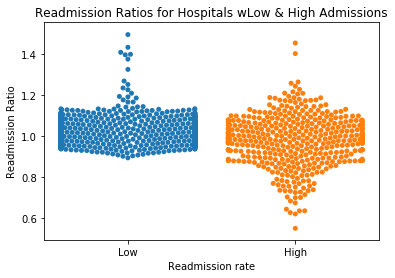

In [26]:
#Swarm plot showing re-admissions ratio for hospitals with low and high admissions rates
df_relhd = df_reld.append(df_rehd)

_ = sns.swarmplot(x='hospital_type', y='readmission_ratio', data=df_relhd)
_ = plt.xlabel('Readmission rate')
_ = plt.ylabel('Readmission Ratio')
_ = plt.title('Readmission Ratios for Hospitals wLow & High Admissions')
plt.show()
